### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data collection and exploration

In [2]:
#Load data
df = pd.read_csv(r"Bank_churn_modelling.csv")
df.shape

(10000, 14)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Observations
    - Columns Surname, CustomerId, RowNumber are statistically insignificant
    - CreditScore and HasCrCard may represent similar information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [6]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Observation
    - Age
        - there are likely to be some outliers of very high age users of the banking products (92 years)
    - Tenure
        - There are customers associated with the bank since 10 years. Hence the bank would have started 10 years ago.
    - Balance
        - More than 25% of customers have 0 Balance
    - IsActiveMember
        - almost 49% of the customers are not active members, they are not using banking products actively
    - Exited
        - Almost 20% of customers have exited the bank

### Data Cleaning

In [8]:
# check for duplicates
df.duplicated().sum()

0

In [9]:
# check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
# check for outliers
df.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [11]:
# drop the unwanted columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Feature Engineering

Correlation Analysis

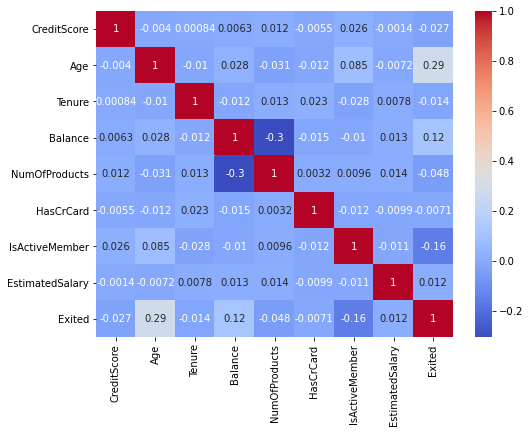

In [13]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

- if corr > 0.5 or corr< -0.5 = strong / very good correlation
- if corr is between -0.1 to +0.1 = bad / weak correlation
- if corr is between -0.1 to -0.5 or +0.1 to +0.5 = good correlation

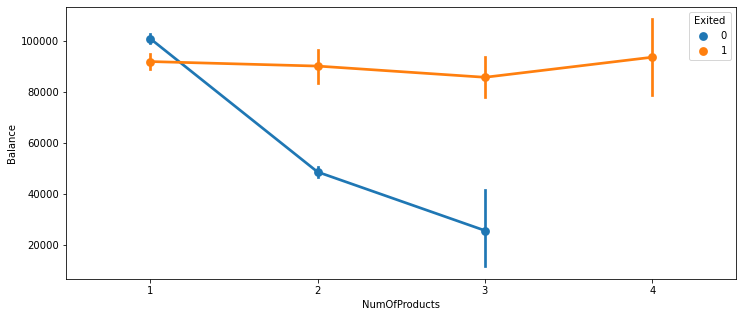

In [14]:
plt.figure(figsize=(12,5))
sns.pointplot(x = 'NumOfProducts',y='Balance',hue='Exited',data=df)
plt.show()

### ANOVA
- Null Hypothesis h0 = the mean and variation in mulitiple groups is similar 
- Alternate hypothesis = the mean and variation in mulitple groups is different

- For CI = 95%, alpha = 1 - Ci = 1 - 0.95 = 0.05

    - if pvalue > alpha = accept the Null Hypothesis, feature is not important
    - if pvalue < alpha = reject the Null Hypothesis, feature is importantm

In [15]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [16]:
nums = ['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'EstimatedSalary']
xd = df[nums]
yd = df['Exited']

from sklearn.feature_selection import f_classif
fscore,pvalue = f_classif(xd,yd)

for i in range(len(nums)):print(nums[i],pvalue[i],pvalue[i]<0.05)

CreditScore 0.006738213892258643 True
Age 1.2399313093415039e-186 True
Tenure 0.1615268494952801 False
Balance 1.275563319153163e-32 True
NumOfProducts 1.7173330048040421e-06 True
EstimatedSalary 0.22644042802376574 False


In [17]:
# important features= CreditScore, Age, Balance, NumOfProduct

### Chi Square test

For CI = 95%, alpha = 1 - Ci = 1 - 0.95 = 0.05
  - if pvalue > alpha = accept the Null Hypothesis, feature is not important
  - if pvalue < alpha = reject the Null Hypothesis, feature is important

In [18]:
cats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
xc = df[cats]
yc = df['Exited']

from sklearn.preprocessing import LabelEncoder
xc['Geography'] = LabelEncoder().fit_transform(xc['Geography'])
xc['Gender'] = LabelEncoder().fit_transform(xc['Gender'])

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [19]:
from sklearn.feature_selection import chi2
cscore, pvalue = chi2(xc,yc)
for i in range(len(cats)):print(cats[i],pvalue[i])

Geography 0.0005756078382573235
Gender 7.015574513879596e-13
HasCrCard 0.6984962089530451
IsActiveMember 1.568036240543455e-27


In [20]:
# important features - Geography, Gender, IsActiveMember
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [21]:
x = df[['CreditScore', 'Geography', 'Gender', 'Age',  'Balance',
       'NumOfProducts','IsActiveMember']]
y = df['Exited']

### Preprocessing

In [22]:
x.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,0.00,1,1
1,608,Spain,Female,41,83807.86,1,1
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1


In [23]:
pd.get_dummies(df[['Geography','Gender']],drop_first=True).head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0


In [24]:
x = pd.concat([x.drop(['Gender','Geography'],axis=1),pd.get_dummies(df[['Geography','Gender']],drop_first=True)],axis=1)
x.head()

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,0.00,1,1,0,0,0
1,608,41,83807.86,1,1,0,1,0
2,502,42,159660.80,3,0,0,0,0
3,699,39,0.00,2,0,0,0,0
4,850,43,125510.82,1,1,0,1,0


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x[['CreditScore','Age','Balance']] = sc.fit_transform(x[['CreditScore','Age','Balance']])
x.head()

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.225848,1,1,0,0,0
1,-0.440036,0.198164,0.117350,1,1,0,1,0
2,-1.536794,0.293517,1.333053,3,0,0,0,0
3,0.501521,0.007457,-1.225848,2,0,0,0,0
4,2.063884,0.388871,0.785728,1,1,0,1,0


In [26]:
x.shape

(10000, 8)

In [27]:
# split the dataset into train set and test set - 80% of data - training the regression model, 20% of to test regression model

from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.23,random_state=5)
print(x.shape)
print(xtr.shape)
print(xts.shape)
print(y.shape)
print(ytr.shape)
print(yts.shape)

(10000, 8)
(7700, 8)
(2300, 8)
(10000,)
(7700,)
(2300,)


### Apply ML - Train regression model

In [28]:
from sklearn.linear_model import LogisticRegression
reg_model = LogisticRegression()

In [29]:
#train the regression model using trian data - xtr,ytr
reg_model.fit(xtr,ytr)

LogisticRegression()

### Performance Analysis

In [30]:
print(xts.shape)
print(yts.shape)

(2300, 8)
(2300,)


#### Accuracy

In [31]:
# test data - xtest, ytest
ypred = reg_model.predict(xts)

# checking the accuracy of model by comparing ypred with yts
from sklearn import metrics
metrics.accuracy_score(yts,ypred)

0.8160869565217391

#### Recall

In [32]:
metrics.recall_score(yts,ypred)

0.20833333333333334

#### Precision

In [33]:
metrics.precision_score(yts,ypred)

0.6050955414012739

In [34]:
pd.DataFrame(metrics.confusion_matrix(yts,ypred))

,0,1
0,1782,62
1,361,95


### Exporting the model for productization

In [35]:
import joblib
joblib.dump(reg_model,"churn_model.pkl")

['churn_model.pkl']